In [1]:
import pandas as pd
import os
from shutil import copyfile
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
data_image_label = pd.read_csv("HAM10000_metadata.csv")
data_image_label

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [7]:
os.listdir()

['.ipynb_checkpoints',
 'HAM10000_images_part_1',
 'HAM10000_metadata.csv',
 'hmnist_28_28_L.csv',
 'hmnist_28_28_RGB.csv',
 'hmnist_8_8_L.csv',
 'hmnist_8_8_RGB.csv',
 'Model.ipynb']

In [5]:
pd.unique(data_image_label["dx"])

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [8]:
# Butuh Sekali Run
data_labeled_dir = "data_labeled/"
try:
    os.mkdir(data_labeled_dir)
except FileExistsError:
    pass
for i in data_image_label["dx"]:
    try:
        os.makedirs(data_labeled_dir+"/"+i)
    except FileExistsError:
        pass

In [9]:
data_training_path = "HAM10000_images_part_1/"
data_label = data_image_label["image_id"][:]

In [10]:
# Preparing Dataset
for i,data in enumerate(data_label):
    image = data+".jpg"
    value_VASC = "vasc" if data_image_label.iloc[i,:]["dx"] == "vasc" else False
    value_MEL = "mel" if data_image_label.iloc[i,:]["dx"] == "mel" else False
    value_NV = "nv" if data_image_label.iloc[i,:]["dx"] == "nv" else False
    value_DF = "df" if data_image_label.iloc[i,:]["dx"] == "df" else False
    value_BKL = "bkl" if data_image_label.iloc[i,:]["dx"] == "bkl" else False
    value_BCC = "bcc" if data_image_label.iloc[i,:]["dx"] == "bcc" else False
    value_AK = "akiec" if data_image_label.iloc[i,:]["dx"] == "akiec" else False
    images = [value_VASC,value_MEL,value_NV,value_DF,value_BKL,value_BCC,value_AK]
    print(image+": "+str(images))
    for i in images:
        if(i):
            label = i
            shutil.copy2(data_training_path+image,data_labeled_dir+label)

    print("{}: {}".format(str(image),str(label)))

ISIC_0027419.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0027419.jpg: bkl
ISIC_0025030.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025030.jpg: bkl
ISIC_0026769.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0026769.jpg: bkl
ISIC_0025661.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025661.jpg: bkl
ISIC_0031633.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0031633.jpg: bkl
ISIC_0027850.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0027850.jpg: bkl
ISIC_0029176.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0029176.jpg: bkl
ISIC_0029068.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0029068.jpg: bkl
ISIC_0025837.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025837.jpg: bkl
ISIC_0025209.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025209.jpg: bkl
ISIC_0025276.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025276.jpg: bkl
ISIC_00293

ISIC_0031639.jpg: bkl
ISIC_0027957.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0027957.jpg: bkl
ISIC_0031212.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0031212.jpg: bkl
ISIC_0032382.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0032382.jpg: bkl
ISIC_0027533.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0027533.jpg: bkl
ISIC_0029674.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0029674.jpg: bkl
ISIC_0028607.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0028607.jpg: bkl
ISIC_0024623.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0024623.jpg: bkl
ISIC_0029613.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0029613.jpg: bkl
ISIC_0029418.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0029418.jpg: bkl
ISIC_0027455.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0027455.jpg: bkl
ISIC_0025906.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_00259

ISIC_0032826.jpg: bkl
ISIC_0034115.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0034115.jpg: bkl
ISIC_0033776.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0033776.jpg: bkl
ISIC_0033056.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0033056.jpg: bkl
ISIC_0025180.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025180.jpg: bkl
ISIC_0026107.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0026107.jpg: bkl
ISIC_0033853.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0033853.jpg: bkl
ISIC_0033453.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0033453.jpg: bkl
ISIC_0034126.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0034126.jpg: bkl
ISIC_0033744.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0033744.jpg: bkl
ISIC_0033659.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0033659.jpg: bkl
ISIC_0032567.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_00325

ISIC_0024711.jpg: bkl
ISIC_0032280.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0032280.jpg: bkl
ISIC_0025982.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025982.jpg: bkl
ISIC_0028120.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0028120.jpg: bkl
ISIC_0032335.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0032335.jpg: bkl
ISIC_0025326.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025326.jpg: bkl
ISIC_0027374.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0027374.jpg: bkl
ISIC_0027781.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0027781.jpg: bkl
ISIC_0024890.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0024890.jpg: bkl
ISIC_0025507.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025507.jpg: bkl
ISIC_0028336.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0028336.jpg: bkl
ISIC_0025838.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_00258

ISIC_0030522.jpg: bkl
ISIC_0029051.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0029051.jpg: bkl
ISIC_0025985.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025985.jpg: bkl
ISIC_0026861.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0026861.jpg: bkl
ISIC_0025830.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025830.jpg: bkl
ISIC_0031686.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0031686.jpg: bkl
ISIC_0030208.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0030208.jpg: bkl
ISIC_0032006.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0032006.jpg: bkl
ISIC_0028920.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0028920.jpg: bkl
ISIC_0030723.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0030723.jpg: bkl
ISIC_0032373.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0032373.jpg: bkl
ISIC_0028555.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_00285

ISIC_0029580.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0029580.jpg: bkl
ISIC_0027527.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0027527.jpg: bkl
ISIC_0028972.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0028972.jpg: bkl
ISIC_0031078.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0031078.jpg: bkl
ISIC_0031464.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0031464.jpg: bkl
ISIC_0025693.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025693.jpg: bkl
ISIC_0032116.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0032116.jpg: bkl
ISIC_0027451.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0027451.jpg: bkl
ISIC_0030329.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0030329.jpg: bkl
ISIC_0029311.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0029311.jpg: bkl
ISIC_0026849.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0026849.jpg: bkl
ISIC_00303

ISIC_0026675.jpg: bkl
ISIC_0026335.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0026335.jpg: bkl
ISIC_0031150.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0031150.jpg: bkl
ISIC_0026070.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0026070.jpg: bkl
ISIC_0032024.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0032024.jpg: bkl
ISIC_0032235.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0032235.jpg: bkl
ISIC_0027916.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0027916.jpg: bkl
ISIC_0025374.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025374.jpg: bkl
ISIC_0031961.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0031961.jpg: bkl
ISIC_0030533.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0030533.jpg: bkl
ISIC_0032456.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0032456.jpg: bkl
ISIC_0026072.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_00260

ISIC_0028376.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0028376.jpg: bkl
ISIC_0026576.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0026576.jpg: bkl
ISIC_0027504.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0027504.jpg: bkl
ISIC_0026409.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0026409.jpg: bkl
ISIC_0025345.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025345.jpg: bkl
ISIC_0032303.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0032303.jpg: bkl
ISIC_0032103.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0032103.jpg: bkl
ISIC_0028707.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0028707.jpg: bkl
ISIC_0024825.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0024825.jpg: bkl
ISIC_0029406.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0029406.jpg: bkl
ISIC_0031980.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0031980.jpg: bkl
ISIC_00286

ISIC_0027194.jpg: bkl
ISIC_0026016.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0026016.jpg: bkl
ISIC_0029505.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0029505.jpg: bkl
ISIC_0025378.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025378.jpg: bkl
ISIC_0030394.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0030394.jpg: bkl
ISIC_0027735.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0027735.jpg: bkl
ISIC_0024814.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0024814.jpg: bkl
ISIC_0031677.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0031677.jpg: bkl
ISIC_0026069.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0026069.jpg: bkl
ISIC_0026524.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0026524.jpg: bkl
ISIC_0027162.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0027162.jpg: bkl
ISIC_0027608.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_00276

ISIC_0025005.jpg: bkl
ISIC_0025851.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0025851.jpg: bkl
ISIC_0028347.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0028347.jpg: bkl
ISIC_0033460.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0033460.jpg: bkl
ISIC_0033722.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0033722.jpg: bkl
ISIC_0034315.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0034315.jpg: bkl
ISIC_0032967.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0032967.jpg: bkl
ISIC_0033199.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0033199.jpg: bkl
ISIC_0032719.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0032719.jpg: bkl
ISIC_0030630.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0030630.jpg: bkl
ISIC_0033305.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0033305.jpg: bkl
ISIC_0032179.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_00321

ISIC_0029793.jpg: bkl
ISIC_0031133.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0031133.jpg: bkl
ISIC_0030959.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0030959.jpg: bkl
ISIC_0029251.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0029251.jpg: bkl
ISIC_0026046.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0026046.jpg: bkl
ISIC_0027875.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0027875.jpg: bkl
ISIC_0029107.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0029107.jpg: bkl
ISIC_0031511.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0031511.jpg: bkl
ISIC_0028587.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0028587.jpg: bkl
ISIC_0026291.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0026291.jpg: bkl
ISIC_0026422.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_0026422.jpg: bkl
ISIC_0030316.jpg: [False, False, False, False, 'bkl', False, False]
ISIC_00303

ISIC_0027613.jpg: [False, False, False, 'df', False, False, False]
ISIC_0027613.jpg: df
ISIC_0032468.jpg: [False, False, False, 'df', False, False, False]
ISIC_0032468.jpg: df
ISIC_0029760.jpg: [False, False, False, 'df', False, False, False]
ISIC_0029760.jpg: df
ISIC_0030555.jpg: [False, False, False, 'df', False, False, False]
ISIC_0030555.jpg: df
ISIC_0030244.jpg: [False, False, False, 'df', False, False, False]
ISIC_0030244.jpg: df
ISIC_0031827.jpg: [False, False, False, 'df', False, False, False]
ISIC_0031827.jpg: df
ISIC_0031002.jpg: [False, False, False, 'df', False, False, False]
ISIC_0031002.jpg: df
ISIC_0025668.jpg: [False, False, False, 'df', False, False, False]
ISIC_0025668.jpg: df
ISIC_0032410.jpg: [False, False, False, 'df', False, False, False]
ISIC_0032410.jpg: df
ISIC_0030579.jpg: [False, False, False, 'df', False, False, False]
ISIC_0030579.jpg: df
ISIC_0034169.jpg: [False, False, False, 'df', False, False, False]
ISIC_0034169.jpg: df
ISIC_0032941.jpg: [False, False,

ISIC_0031257.jpg: df
ISIC_0024386.jpg: [False, False, False, 'df', False, False, False]
ISIC_0024386.jpg: df
ISIC_0026629.jpg: [False, False, False, 'df', False, False, False]
ISIC_0026629.jpg: df
ISIC_0029973.jpg: [False, False, False, 'df', False, False, False]
ISIC_0029973.jpg: df
ISIC_0027598.jpg: [False, False, False, 'df', False, False, False]
ISIC_0027598.jpg: df
ISIC_0031799.jpg: [False, False, False, 'df', False, False, False]
ISIC_0031799.jpg: df
ISIC_0029130.jpg: [False, False, False, 'df', False, False, False]
ISIC_0029130.jpg: df
ISIC_0027044.jpg: [False, False, False, 'df', False, False, False]
ISIC_0027044.jpg: df
ISIC_0029177.jpg: [False, False, False, 'df', False, False, False]
ISIC_0029177.jpg: df
ISIC_0025314.jpg: [False, False, False, 'df', False, False, False]
ISIC_0025314.jpg: df
ISIC_0025373.jpg: [False, False, False, 'df', False, False, False]
ISIC_0025373.jpg: df
ISIC_0025771.jpg: [False, False, False, 'df', False, False, False]
ISIC_0025771.jpg: df
ISIC_003087

ISIC_0030898.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0030898.jpg: mel
ISIC_0032244.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032244.jpg: mel
ISIC_0028901.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0028901.jpg: mel
ISIC_0032098.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032098.jpg: mel
ISIC_0025603.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0025603.jpg: mel
ISIC_0029651.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0029651.jpg: mel
ISIC_0032044.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032044.jpg: mel
ISIC_0030759.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0030759.jpg: mel
ISIC_0024886.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0024886.jpg: mel
ISIC_0027102.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0027102.jpg: mel
ISIC_0025904.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0025904.jpg: mel
ISIC_00324

ISIC_0024400.jpg: mel
ISIC_0029884.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0029884.jpg: mel
ISIC_0028900.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0028900.jpg: mel
ISIC_0027387.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0027387.jpg: mel
ISIC_0024911.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0024911.jpg: mel
ISIC_0027659.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0027659.jpg: mel
ISIC_0030223.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0030223.jpg: mel
ISIC_0032182.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032182.jpg: mel
ISIC_0027721.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0027721.jpg: mel
ISIC_0026697.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0026697.jpg: mel
ISIC_0030760.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0030760.jpg: mel
ISIC_0028565.jpg: [False, 'mel', False, False, False, False, False]
ISIC_00285

ISIC_0033432.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033432.jpg: mel
ISIC_0032833.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032833.jpg: mel
ISIC_0034236.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0034236.jpg: mel
ISIC_0033027.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033027.jpg: mel
ISIC_0034118.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0034118.jpg: mel
ISIC_0033476.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033476.jpg: mel
ISIC_0033047.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033047.jpg: mel
ISIC_0025987.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0025987.jpg: mel
ISIC_0032017.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032017.jpg: mel
ISIC_0033946.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033946.jpg: mel
ISIC_0033369.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033369.jpg: mel
ISIC_00324

ISIC_0033473.jpg: mel
ISIC_0030564.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0030564.jpg: mel
ISIC_0033337.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033337.jpg: mel
ISIC_0033594.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033594.jpg: mel
ISIC_0029209.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0029209.jpg: mel
ISIC_0026976.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0026976.jpg: mel
ISIC_0033275.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033275.jpg: mel
ISIC_0033938.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033938.jpg: mel
ISIC_0032841.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032841.jpg: mel
ISIC_0033819.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033819.jpg: mel
ISIC_0032544.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032544.jpg: mel
ISIC_0032844.jpg: [False, 'mel', False, False, False, False, False]
ISIC_00328

ISIC_0033304.jpg: mel
ISIC_0032806.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032806.jpg: mel
ISIC_0033624.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033624.jpg: mel
ISIC_0033238.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033238.jpg: mel
ISIC_0034089.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0034089.jpg: mel
ISIC_0034048.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0034048.jpg: mel
ISIC_0033905.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033905.jpg: mel
ISIC_0033981.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033981.jpg: mel
ISIC_0033336.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033336.jpg: mel
ISIC_0033405.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033405.jpg: mel
ISIC_0034188.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0034188.jpg: mel
ISIC_0033269.jpg: [False, 'mel', False, False, False, False, False]
ISIC_00332

ISIC_0034049.jpg: mel
ISIC_0033300.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033300.jpg: mel
ISIC_0033616.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033616.jpg: mel
ISIC_0029606.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0029606.jpg: mel
ISIC_0033099.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033099.jpg: mel
ISIC_0032723.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032723.jpg: mel
ISIC_0032751.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032751.jpg: mel
ISIC_0032597.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032597.jpg: mel
ISIC_0032982.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032982.jpg: mel
ISIC_0033196.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033196.jpg: mel
ISIC_0032653.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032653.jpg: mel
ISIC_0032730.jpg: [False, 'mel', False, False, False, False, False]
ISIC_00327

ISIC_0033773.jpg: mel
ISIC_0033752.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033752.jpg: mel
ISIC_0033424.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033424.jpg: mel
ISIC_0034216.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0034216.jpg: mel
ISIC_0032152.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032152.jpg: mel
ISIC_0033730.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033730.jpg: mel
ISIC_0032975.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032975.jpg: mel
ISIC_0034243.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0034243.jpg: mel
ISIC_0034050.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0034050.jpg: mel
ISIC_0033114.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0033114.jpg: mel
ISIC_0032559.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032559.jpg: mel
ISIC_0030150.jpg: [False, 'mel', False, False, False, False, False]
ISIC_00301

ISIC_0030754.jpg: mel
ISIC_0030034.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0030034.jpg: mel
ISIC_0029397.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0029397.jpg: mel
ISIC_0025316.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0025316.jpg: mel
ISIC_0029316.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0029316.jpg: mel
ISIC_0027552.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0027552.jpg: mel
ISIC_0026954.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0026954.jpg: mel
ISIC_0028760.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0028760.jpg: mel
ISIC_0027620.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0027620.jpg: mel
ISIC_0028965.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0028965.jpg: mel
ISIC_0030356.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0030356.jpg: mel
ISIC_0027407.jpg: [False, 'mel', False, False, False, False, False]
ISIC_00274

ISIC_0024961.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0024961.jpg: mel
ISIC_0029319.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0029319.jpg: mel
ISIC_0032219.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032219.jpg: mel
ISIC_0025127.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0025127.jpg: mel
ISIC_0029318.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0029318.jpg: mel
ISIC_0032070.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032070.jpg: mel
ISIC_0026796.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0026796.jpg: mel
ISIC_0026811.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0026811.jpg: mel
ISIC_0029839.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0029839.jpg: mel
ISIC_0030747.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0030747.jpg: mel
ISIC_0026604.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0026604.jpg: mel
ISIC_00287

ISIC_0027089.jpg: mel
ISIC_0026239.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0026239.jpg: mel
ISIC_0030255.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0030255.jpg: mel
ISIC_0029495.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0029495.jpg: mel
ISIC_0032269.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0032269.jpg: mel
ISIC_0031350.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0031350.jpg: mel
ISIC_0025832.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0025832.jpg: mel
ISIC_0026105.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0026105.jpg: mel
ISIC_0029574.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0029574.jpg: mel
ISIC_0027179.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0027179.jpg: mel
ISIC_0026930.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0026930.jpg: mel
ISIC_0030246.jpg: [False, 'mel', False, False, False, False, False]
ISIC_00302

ISIC_0029652.jpg: mel
ISIC_0031295.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0031295.jpg: mel
ISIC_0026647.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0026647.jpg: mel
ISIC_0025317.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0025317.jpg: mel
ISIC_0026420.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0026420.jpg: mel
ISIC_0028764.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0028764.jpg: mel
ISIC_0029021.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0029021.jpg: mel
ISIC_0027359.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0027359.jpg: mel
ISIC_0025616.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0025616.jpg: mel
ISIC_0028075.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0028075.jpg: mel
ISIC_0026823.jpg: [False, 'mel', False, False, False, False, False]
ISIC_0026823.jpg: mel
ISIC_0030929.jpg: [False, 'mel', False, False, False, False, False]
ISIC_00309

ISIC_0025924.jpg: vasc
ISIC_0031719.jpg: ['vasc', False, False, False, False, False, False]
ISIC_0031719.jpg: vasc
ISIC_0030070.jpg: ['vasc', False, False, False, False, False, False]
ISIC_0030070.jpg: vasc
ISIC_0031093.jpg: ['vasc', False, False, False, False, False, False]
ISIC_0031093.jpg: vasc
ISIC_0029608.jpg: ['vasc', False, False, False, False, False, False]
ISIC_0029608.jpg: vasc
ISIC_0024402.jpg: ['vasc', False, False, False, False, False, False]
ISIC_0024402.jpg: vasc
ISIC_0027256.jpg: ['vasc', False, False, False, False, False, False]
ISIC_0027256.jpg: vasc
ISIC_0032715.jpg: ['vasc', False, False, False, False, False, False]
ISIC_0032715.jpg: vasc
ISIC_0033991.jpg: ['vasc', False, False, False, False, False, False]
ISIC_0033991.jpg: vasc
ISIC_0033817.jpg: ['vasc', False, False, False, False, False, False]
ISIC_0033817.jpg: vasc
ISIC_0032839.jpg: ['vasc', False, False, False, False, False, False]
ISIC_0032839.jpg: vasc
ISIC_0032932.jpg: ['vasc', False, False, False, False, Fa

ISIC_0030446.jpg: bcc
ISIC_0031527.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0031527.jpg: bcc
ISIC_0031166.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0031166.jpg: bcc
ISIC_0028693.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0028693.jpg: bcc
ISIC_0030893.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0030893.jpg: bcc
ISIC_0030261.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0030261.jpg: bcc
ISIC_0028994.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0028994.jpg: bcc
ISIC_0032696.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0032696.jpg: bcc
ISIC_0029466.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0029466.jpg: bcc
ISIC_0027057.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0027057.jpg: bcc
ISIC_0028085.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0028085.jpg: bcc
ISIC_0025691.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_00256

ISIC_0034160.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0034160.jpg: bcc
ISIC_0026453.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0026453.jpg: bcc
ISIC_0031489.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0031489.jpg: bcc
ISIC_0027297.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0027297.jpg: bcc
ISIC_0028980.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0028980.jpg: bcc
ISIC_0032660.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0032660.jpg: bcc
ISIC_0033504.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0033504.jpg: bcc
ISIC_0024885.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0024885.jpg: bcc
ISIC_0027058.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0027058.jpg: bcc
ISIC_0030114.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0030114.jpg: bcc
ISIC_0029020.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0029020.jpg: bcc
ISIC_00329

ISIC_0030233.jpg: bcc
ISIC_0028688.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0028688.jpg: bcc
ISIC_0028677.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0028677.jpg: bcc
ISIC_0028818.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0028818.jpg: bcc
ISIC_0028059.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0028059.jpg: bcc
ISIC_0025576.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0025576.jpg: bcc
ISIC_0029331.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0029331.jpg: bcc
ISIC_0029546.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0029546.jpg: bcc
ISIC_0029392.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0029392.jpg: bcc
ISIC_0027601.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0027601.jpg: bcc
ISIC_0031698.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0031698.jpg: bcc
ISIC_0031245.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_00312

ISIC_0032307.jpg: bcc
ISIC_0026978.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0026978.jpg: bcc
ISIC_0026845.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0026845.jpg: bcc
ISIC_0027966.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0027966.jpg: bcc
ISIC_0024448.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0024448.jpg: bcc
ISIC_0032022.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0032022.jpg: bcc
ISIC_0024452.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0024452.jpg: bcc
ISIC_0029539.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0029539.jpg: bcc
ISIC_0031258.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0031258.jpg: bcc
ISIC_0030197.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0030197.jpg: bcc
ISIC_0024582.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0024582.jpg: bcc
ISIC_0029655.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_00296

ISIC_0032030.jpg: bcc
ISIC_0031651.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0031651.jpg: bcc
ISIC_0027525.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0027525.jpg: bcc
ISIC_0024550.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0024550.jpg: bcc
ISIC_0029919.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0029919.jpg: bcc
ISIC_0028928.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0028928.jpg: bcc
ISIC_0031378.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0031378.jpg: bcc
ISIC_0024564.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0024564.jpg: bcc
ISIC_0025322.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0025322.jpg: bcc
ISIC_0027677.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0027677.jpg: bcc
ISIC_0024833.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0024833.jpg: bcc
ISIC_0027546.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_00275

ISIC_0031971.jpg: bcc
ISIC_0031721.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0031721.jpg: bcc
ISIC_0028542.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0028542.jpg: bcc
ISIC_0025260.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0025260.jpg: bcc
ISIC_0031531.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0031531.jpg: bcc
ISIC_0028978.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0028978.jpg: bcc
ISIC_0028728.jpg: [False, False, False, False, False, 'bcc', False]
ISIC_0028728.jpg: bcc
ISIC_0032212.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032212.jpg: nv
ISIC_0025775.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025775.jpg: nv
ISIC_0029828.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029828.jpg: nv
ISIC_0031588.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031588.jpg: nv
ISIC_0028502.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028502.jpg: n

ISIC_0028879.jpg: nv
ISIC_0030148.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030148.jpg: nv
ISIC_0029540.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029540.jpg: nv
ISIC_0028924.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028924.jpg: nv
ISIC_0032016.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032016.jpg: nv
ISIC_0032048.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032048.jpg: nv
ISIC_0026255.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026255.jpg: nv
ISIC_0030013.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030013.jpg: nv
ISIC_0031371.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031371.jpg: nv
ISIC_0025585.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025585.jpg: nv
ISIC_0030523.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030523.jpg: nv
ISIC_0031100.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031100.jpg: nv
ISIC_003167

ISIC_0027339.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027339.jpg: nv
ISIC_0028339.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028339.jpg: nv
ISIC_0031331.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031331.jpg: nv
ISIC_0025432.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025432.jpg: nv
ISIC_0026557.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026557.jpg: nv
ISIC_0027170.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027170.jpg: nv
ISIC_0031997.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031997.jpg: nv
ISIC_0030669.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030669.jpg: nv
ISIC_0032490.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032490.jpg: nv
ISIC_0030642.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030642.jpg: nv
ISIC_0025364.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025364.jpg: nv
ISIC_0027703.jpg: [False, False,

ISIC_0026283.jpg: nv
ISIC_0029892.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029892.jpg: nv
ISIC_0027912.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027912.jpg: nv
ISIC_0029943.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029943.jpg: nv
ISIC_0029561.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029561.jpg: nv
ISIC_0026682.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026682.jpg: nv
ISIC_0027416.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027416.jpg: nv
ISIC_0028848.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028848.jpg: nv
ISIC_0028862.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028862.jpg: nv
ISIC_0024746.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024746.jpg: nv
ISIC_0029044.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029044.jpg: nv
ISIC_0028054.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028054.jpg: nv
ISIC_003055

ISIC_0030302.jpg: nv
ISIC_0028812.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028812.jpg: nv
ISIC_0031606.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031606.jpg: nv
ISIC_0031422.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031422.jpg: nv
ISIC_0032453.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032453.jpg: nv
ISIC_0029784.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029784.jpg: nv
ISIC_0029633.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029633.jpg: nv
ISIC_0027136.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027136.jpg: nv
ISIC_0028546.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028546.jpg: nv
ISIC_0028111.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028111.jpg: nv
ISIC_0030880.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030880.jpg: nv
ISIC_0025041.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025041.jpg: nv
ISIC_002776

ISIC_0025444.jpg: nv
ISIC_0025274.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025274.jpg: nv
ISIC_0030120.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030120.jpg: nv
ISIC_0026057.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026057.jpg: nv
ISIC_0025878.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025878.jpg: nv
ISIC_0027375.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027375.jpg: nv
ISIC_0031534.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031534.jpg: nv
ISIC_0025613.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025613.jpg: nv
ISIC_0027564.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027564.jpg: nv
ISIC_0027145.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027145.jpg: nv
ISIC_0025256.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025256.jpg: nv
ISIC_0026465.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026465.jpg: nv
ISIC_002625

ISIC_0026817.jpg: nv
ISIC_0029274.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029274.jpg: nv
ISIC_0027165.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027165.jpg: nv
ISIC_0031250.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031250.jpg: nv
ISIC_0025084.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025084.jpg: nv
ISIC_0028337.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028337.jpg: nv
ISIC_0031438.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031438.jpg: nv
ISIC_0028077.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028077.jpg: nv
ISIC_0029132.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029132.jpg: nv
ISIC_0024429.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024429.jpg: nv
ISIC_0029972.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029972.jpg: nv
ISIC_0030519.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030519.jpg: nv
ISIC_002694

ISIC_0028833.jpg: nv
ISIC_0029335.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029335.jpg: nv
ISIC_0030875.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030875.jpg: nv
ISIC_0024964.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024964.jpg: nv
ISIC_0026087.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026087.jpg: nv
ISIC_0031647.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031647.jpg: nv
ISIC_0030351.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030351.jpg: nv
ISIC_0025104.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025104.jpg: nv
ISIC_0025634.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025634.jpg: nv
ISIC_0029883.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029883.jpg: nv
ISIC_0026994.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026994.jpg: nv
ISIC_0029266.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029266.jpg: nv
ISIC_002452

ISIC_0030285.jpg: nv
ISIC_0026415.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026415.jpg: nv
ISIC_0025738.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025738.jpg: nv
ISIC_0026201.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026201.jpg: nv
ISIC_0030570.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030570.jpg: nv
ISIC_0026243.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026243.jpg: nv
ISIC_0026470.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026470.jpg: nv
ISIC_0025359.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025359.jpg: nv
ISIC_0025246.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025246.jpg: nv
ISIC_0028377.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028377.jpg: nv
ISIC_0027910.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027910.jpg: nv
ISIC_0025090.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025090.jpg: nv
ISIC_003052

ISIC_0032088.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032088.jpg: nv
ISIC_0029367.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029367.jpg: nv
ISIC_0032223.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032223.jpg: nv
ISIC_0026449.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026449.jpg: nv
ISIC_0028609.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028609.jpg: nv
ISIC_0031355.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031355.jpg: nv
ISIC_0025866.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025866.jpg: nv
ISIC_0025877.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025877.jpg: nv
ISIC_0030509.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030509.jpg: nv
ISIC_0024641.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024641.jpg: nv
ISIC_0026854.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026854.jpg: nv
ISIC_0024860.jpg: [False, False,

ISIC_0025082.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025082.jpg: nv
ISIC_0030418.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030418.jpg: nv
ISIC_0026515.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026515.jpg: nv
ISIC_0027539.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027539.jpg: nv
ISIC_0028647.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028647.jpg: nv
ISIC_0031581.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031581.jpg: nv
ISIC_0030262.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030262.jpg: nv
ISIC_0029181.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029181.jpg: nv
ISIC_0032399.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032399.jpg: nv
ISIC_0029706.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029706.jpg: nv
ISIC_0029550.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029550.jpg: nv
ISIC_0025493.jpg: [False, False,

ISIC_0031320.jpg: nv
ISIC_0030896.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030896.jpg: nv
ISIC_0032505.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032505.jpg: nv
ISIC_0032080.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032080.jpg: nv
ISIC_0029456.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029456.jpg: nv
ISIC_0025894.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025894.jpg: nv
ISIC_0028279.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028279.jpg: nv
ISIC_0030692.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030692.jpg: nv
ISIC_0026688.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026688.jpg: nv
ISIC_0028908.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028908.jpg: nv
ISIC_0024395.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024395.jpg: nv
ISIC_0026791.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026791.jpg: nv
ISIC_002617

ISIC_0027936.jpg: nv
ISIC_0032500.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032500.jpg: nv
ISIC_0025119.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025119.jpg: nv
ISIC_0025976.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025976.jpg: nv
ISIC_0026474.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026474.jpg: nv
ISIC_0028182.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028182.jpg: nv
ISIC_0027230.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027230.jpg: nv
ISIC_0030248.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030248.jpg: nv
ISIC_0026691.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026691.jpg: nv
ISIC_0031144.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031144.jpg: nv
ISIC_0028535.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028535.jpg: nv
ISIC_0024574.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024574.jpg: nv
ISIC_002529

ISIC_0028731.jpg: nv
ISIC_0030643.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030643.jpg: nv
ISIC_0030684.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030684.jpg: nv
ISIC_0027353.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027353.jpg: nv
ISIC_0026701.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026701.jpg: nv
ISIC_0031162.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031162.jpg: nv
ISIC_0030916.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030916.jpg: nv
ISIC_0032004.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032004.jpg: nv
ISIC_0028301.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028301.jpg: nv
ISIC_0028616.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028616.jpg: nv
ISIC_0027225.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027225.jpg: nv
ISIC_0032413.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032413.jpg: nv
ISIC_002682

ISIC_0031230.jpg: nv
ISIC_0027016.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027016.jpg: nv
ISIC_0026300.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026300.jpg: nv
ISIC_0031032.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031032.jpg: nv
ISIC_0030554.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030554.jpg: nv
ISIC_0027378.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027378.jpg: nv
ISIC_0031679.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031679.jpg: nv
ISIC_0031373.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031373.jpg: nv
ISIC_0031854.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031854.jpg: nv
ISIC_0025135.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025135.jpg: nv
ISIC_0026119.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026119.jpg: nv
ISIC_0028674.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028674.jpg: nv
ISIC_002971

ISIC_0029788.jpg: nv
ISIC_0032479.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032479.jpg: nv
ISIC_0031471.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031471.jpg: nv
ISIC_0031030.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031030.jpg: nv
ISIC_0031525.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031525.jpg: nv
ISIC_0030480.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030480.jpg: nv
ISIC_0028667.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028667.jpg: nv
ISIC_0027191.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027191.jpg: nv
ISIC_0027032.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027032.jpg: nv
ISIC_0026191.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026191.jpg: nv
ISIC_0029595.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029595.jpg: nv
ISIC_0024990.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024990.jpg: nv
ISIC_003086

ISIC_0024342.jpg: nv
ISIC_0028081.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028081.jpg: nv
ISIC_0024950.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024950.jpg: nv
ISIC_0028991.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028991.jpg: nv
ISIC_0030495.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030495.jpg: nv
ISIC_0026999.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026999.jpg: nv
ISIC_0027496.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027496.jpg: nv
ISIC_0029762.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029762.jpg: nv
ISIC_0031787.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031787.jpg: nv
ISIC_0029758.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029758.jpg: nv
ISIC_0026002.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026002.jpg: nv
ISIC_0025632.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025632.jpg: nv
ISIC_002743

ISIC_0028839.jpg: nv
ISIC_0028907.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028907.jpg: nv
ISIC_0028245.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028245.jpg: nv
ISIC_0026748.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026748.jpg: nv
ISIC_0029663.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029663.jpg: nv
ISIC_0027518.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027518.jpg: nv
ISIC_0031747.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031747.jpg: nv
ISIC_0025258.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025258.jpg: nv
ISIC_0032117.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032117.jpg: nv
ISIC_0032377.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032377.jpg: nv
ISIC_0030510.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030510.jpg: nv
ISIC_0026648.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026648.jpg: nv
ISIC_002510

ISIC_0025067.jpg: nv
ISIC_0029649.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029649.jpg: nv
ISIC_0032255.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032255.jpg: nv
ISIC_0028661.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028661.jpg: nv
ISIC_0026127.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026127.jpg: nv
ISIC_0028483.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028483.jpg: nv
ISIC_0031990.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031990.jpg: nv
ISIC_0027245.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027245.jpg: nv
ISIC_0031914.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031914.jpg: nv
ISIC_0031382.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031382.jpg: nv
ISIC_0027272.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027272.jpg: nv
ISIC_0032252.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032252.jpg: nv
ISIC_003173

ISIC_0029626.jpg: nv
ISIC_0032416.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032416.jpg: nv
ISIC_0029175.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029175.jpg: nv
ISIC_0025480.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025480.jpg: nv
ISIC_0029622.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029622.jpg: nv
ISIC_0027879.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027879.jpg: nv
ISIC_0024536.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024536.jpg: nv
ISIC_0030763.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030763.jpg: nv
ISIC_0029587.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029587.jpg: nv
ISIC_0031846.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031846.jpg: nv
ISIC_0026685.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026685.jpg: nv
ISIC_0025896.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025896.jpg: nv
ISIC_003102

ISIC_0030386.jpg: nv
ISIC_0032401.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032401.jpg: nv
ISIC_0030252.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030252.jpg: nv
ISIC_0024528.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024528.jpg: nv
ISIC_0026102.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026102.jpg: nv
ISIC_0024699.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024699.jpg: nv
ISIC_0029240.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029240.jpg: nv
ISIC_0025204.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025204.jpg: nv
ISIC_0028000.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028000.jpg: nv
ISIC_0027934.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027934.jpg: nv
ISIC_0030713.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030713.jpg: nv
ISIC_0028634.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028634.jpg: nv
ISIC_002850

ISIC_0024783.jpg: nv
ISIC_0028259.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028259.jpg: nv
ISIC_0026187.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026187.jpg: nv
ISIC_0025962.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025962.jpg: nv
ISIC_0024347.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024347.jpg: nv
ISIC_0029631.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029631.jpg: nv
ISIC_0029754.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029754.jpg: nv
ISIC_0028176.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028176.jpg: nv
ISIC_0031736.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031736.jpg: nv
ISIC_0028806.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028806.jpg: nv
ISIC_0028416.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028416.jpg: nv
ISIC_0024607.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024607.jpg: nv
ISIC_002538

ISIC_0025821.jpg: nv
ISIC_0029237.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029237.jpg: nv
ISIC_0028274.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028274.jpg: nv
ISIC_0027449.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027449.jpg: nv
ISIC_0025886.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025886.jpg: nv
ISIC_0028269.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028269.jpg: nv
ISIC_0031075.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031075.jpg: nv
ISIC_0030631.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030631.jpg: nv
ISIC_0026160.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026160.jpg: nv
ISIC_0029960.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029960.jpg: nv
ISIC_0024506.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024506.jpg: nv
ISIC_0030716.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030716.jpg: nv
ISIC_003047

ISIC_0028125.jpg: nv
ISIC_0026284.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026284.jpg: nv
ISIC_0028892.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028892.jpg: nv
ISIC_0028725.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028725.jpg: nv
ISIC_0025216.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025216.jpg: nv
ISIC_0027050.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027050.jpg: nv
ISIC_0031843.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031843.jpg: nv
ISIC_0027777.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027777.jpg: nv
ISIC_0028469.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028469.jpg: nv
ISIC_0031252.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031252.jpg: nv
ISIC_0030750.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030750.jpg: nv
ISIC_0031516.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031516.jpg: nv
ISIC_002557

ISIC_0026944.jpg: nv
ISIC_0024326.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024326.jpg: nv
ISIC_0030879.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030879.jpg: nv
ISIC_0024600.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024600.jpg: nv
ISIC_0025283.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025283.jpg: nv
ISIC_0030078.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030078.jpg: nv
ISIC_0030345.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030345.jpg: nv
ISIC_0027676.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027676.jpg: nv
ISIC_0026063.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026063.jpg: nv
ISIC_0028321.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028321.jpg: nv
ISIC_0024316.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024316.jpg: nv
ISIC_0026386.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026386.jpg: nv
ISIC_003060

ISIC_0026035.jpg: nv
ISIC_0026379.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026379.jpg: nv
ISIC_0024912.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024912.jpg: nv
ISIC_0027918.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027918.jpg: nv
ISIC_0032431.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032431.jpg: nv
ISIC_0029173.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029173.jpg: nv
ISIC_0030647.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030647.jpg: nv
ISIC_0026146.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026146.jpg: nv
ISIC_0025014.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025014.jpg: nv
ISIC_0031772.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031772.jpg: nv
ISIC_0026563.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026563.jpg: nv
ISIC_0029964.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029964.jpg: nv
ISIC_002915

ISIC_0025401.jpg: nv
ISIC_0026579.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026579.jpg: nv
ISIC_0031568.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031568.jpg: nv
ISIC_0029551.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029551.jpg: nv
ISIC_0028713.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028713.jpg: nv
ISIC_0029620.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029620.jpg: nv
ISIC_0030917.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030917.jpg: nv
ISIC_0024483.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024483.jpg: nv
ISIC_0029477.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029477.jpg: nv
ISIC_0031879.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031879.jpg: nv
ISIC_0030637.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030637.jpg: nv
ISIC_0027845.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027845.jpg: nv
ISIC_002599

ISIC_0030234.jpg: nv
ISIC_0029285.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029285.jpg: nv
ISIC_0026495.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026495.jpg: nv
ISIC_0031885.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031885.jpg: nv
ISIC_0031312.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031312.jpg: nv
ISIC_0032323.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032323.jpg: nv
ISIC_0025159.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025159.jpg: nv
ISIC_0025739.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025739.jpg: nv
ISIC_0026925.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026925.jpg: nv
ISIC_0025574.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025574.jpg: nv
ISIC_0026304.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026304.jpg: nv
ISIC_0027685.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027685.jpg: nv
ISIC_002763

ISIC_0025765.jpg: nv
ISIC_0028162.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028162.jpg: nv
ISIC_0030749.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030749.jpg: nv
ISIC_0025864.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025864.jpg: nv
ISIC_0026903.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026903.jpg: nv
ISIC_0026033.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026033.jpg: nv
ISIC_0032037.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032037.jpg: nv
ISIC_0032319.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032319.jpg: nv
ISIC_0028663.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028663.jpg: nv
ISIC_0029800.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029800.jpg: nv
ISIC_0031886.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031886.jpg: nv
ISIC_0027381.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027381.jpg: nv
ISIC_002658

ISIC_0032393.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032393.jpg: nv
ISIC_0026636.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026636.jpg: nv
ISIC_0026521.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026521.jpg: nv
ISIC_0024373.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024373.jpg: nv
ISIC_0026801.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026801.jpg: nv
ISIC_0028837.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028837.jpg: nv
ISIC_0030259.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030259.jpg: nv
ISIC_0031356.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031356.jpg: nv
ISIC_0025556.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025556.jpg: nv
ISIC_0030715.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030715.jpg: nv
ISIC_0031850.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031850.jpg: nv
ISIC_0032033.jpg: [False, False,

ISIC_0027336.jpg: nv
ISIC_0028776.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028776.jpg: nv
ISIC_0028575.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028575.jpg: nv
ISIC_0029971.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029971.jpg: nv
ISIC_0026001.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026001.jpg: nv
ISIC_0032097.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032097.jpg: nv
ISIC_0028089.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028089.jpg: nv
ISIC_0032458.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032458.jpg: nv
ISIC_0031562.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031562.jpg: nv
ISIC_0025727.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025727.jpg: nv
ISIC_0024467.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024467.jpg: nv
ISIC_0026447.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026447.jpg: nv
ISIC_002500

ISIC_0028191.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028191.jpg: nv
ISIC_0032131.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032131.jpg: nv
ISIC_0029424.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029424.jpg: nv
ISIC_0030632.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030632.jpg: nv
ISIC_0024567.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024567.jpg: nv
ISIC_0027288.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027288.jpg: nv
ISIC_0027196.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027196.jpg: nv
ISIC_0032101.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032101.jpg: nv
ISIC_0030412.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030412.jpg: nv
ISIC_0028047.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028047.jpg: nv
ISIC_0030298.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030298.jpg: nv
ISIC_0029198.jpg: [False, False,

ISIC_0031835.jpg: nv
ISIC_0028629.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028629.jpg: nv
ISIC_0031193.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031193.jpg: nv
ISIC_0028351.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028351.jpg: nv
ISIC_0026363.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026363.jpg: nv
ISIC_0029832.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029832.jpg: nv
ISIC_0026723.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026723.jpg: nv
ISIC_0031868.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031868.jpg: nv
ISIC_0032326.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032326.jpg: nv
ISIC_0026776.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026776.jpg: nv
ISIC_0032383.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032383.jpg: nv
ISIC_0026013.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026013.jpg: nv
ISIC_003133

ISIC_0027842.jpg: nv
ISIC_0028630.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028630.jpg: nv
ISIC_0029159.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029159.jpg: nv
ISIC_0026605.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026605.jpg: nv
ISIC_0030889.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030889.jpg: nv
ISIC_0027866.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027866.jpg: nv
ISIC_0029777.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029777.jpg: nv
ISIC_0030045.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030045.jpg: nv
ISIC_0030496.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030496.jpg: nv
ISIC_0029164.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029164.jpg: nv
ISIC_0031084.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031084.jpg: nv
ISIC_0024423.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024423.jpg: nv
ISIC_002680

ISIC_0028073.jpg: nv
ISIC_0026756.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026756.jpg: nv
ISIC_0024728.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024728.jpg: nv
ISIC_0026943.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026943.jpg: nv
ISIC_0029077.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029077.jpg: nv
ISIC_0028614.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028614.jpg: nv
ISIC_0030739.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030739.jpg: nv
ISIC_0028605.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028605.jpg: nv
ISIC_0025418.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025418.jpg: nv
ISIC_0032077.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032077.jpg: nv
ISIC_0030611.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030611.jpg: nv
ISIC_0027363.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027363.jpg: nv
ISIC_002741

ISIC_0031688.jpg: nv
ISIC_0029739.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029739.jpg: nv
ISIC_0024797.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024797.jpg: nv
ISIC_0025347.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025347.jpg: nv
ISIC_0030807.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030807.jpg: nv
ISIC_0027946.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027946.jpg: nv
ISIC_0032485.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032485.jpg: nv
ISIC_0028342.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028342.jpg: nv
ISIC_0032119.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032119.jpg: nv
ISIC_0030301.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030301.jpg: nv
ISIC_0029804.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029804.jpg: nv
ISIC_0027493.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027493.jpg: nv
ISIC_003173

ISIC_0024988.jpg: nv
ISIC_0029310.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029310.jpg: nv
ISIC_0027515.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027515.jpg: nv
ISIC_0030205.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030205.jpg: nv
ISIC_0029350.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029350.jpg: nv
ISIC_0028315.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028315.jpg: nv
ISIC_0030449.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030449.jpg: nv
ISIC_0027223.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027223.jpg: nv
ISIC_0031456.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031456.jpg: nv
ISIC_0024942.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024942.jpg: nv
ISIC_0029395.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029395.jpg: nv
ISIC_0026061.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026061.jpg: nv
ISIC_002684

ISIC_0028914.jpg: nv
ISIC_0026020.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026020.jpg: nv
ISIC_0030646.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030646.jpg: nv
ISIC_0025177.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025177.jpg: nv
ISIC_0027530.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027530.jpg: nv
ISIC_0029049.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029049.jpg: nv
ISIC_0029018.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029018.jpg: nv
ISIC_0026934.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026934.jpg: nv
ISIC_0026346.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026346.jpg: nv
ISIC_0032475.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032475.jpg: nv
ISIC_0032294.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032294.jpg: nv
ISIC_0029214.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029214.jpg: nv
ISIC_002711

ISIC_0027152.jpg: nv
ISIC_0029045.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029045.jpg: nv
ISIC_0031160.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031160.jpg: nv
ISIC_0029735.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029735.jpg: nv
ISIC_0028010.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028010.jpg: nv
ISIC_0026666.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026666.jpg: nv
ISIC_0026552.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026552.jpg: nv
ISIC_0029985.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029985.jpg: nv
ISIC_0024891.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024891.jpg: nv
ISIC_0024934.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024934.jpg: nv
ISIC_0025442.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025442.jpg: nv
ISIC_0028461.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028461.jpg: nv
ISIC_003147

ISIC_0030741.jpg: nv
ISIC_0024986.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024986.jpg: nv
ISIC_0031555.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031555.jpg: nv
ISIC_0027462.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027462.jpg: nv
ISIC_0025254.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025254.jpg: nv
ISIC_0031660.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031660.jpg: nv
ISIC_0024824.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024824.jpg: nv
ISIC_0030666.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030666.jpg: nv
ISIC_0031293.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031293.jpg: nv
ISIC_0026376.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026376.jpg: nv
ISIC_0031560.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031560.jpg: nv
ISIC_0025809.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025809.jpg: nv
ISIC_002510

ISIC_0031676.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031676.jpg: nv
ISIC_0032151.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032151.jpg: nv
ISIC_0031615.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031615.jpg: nv
ISIC_0031592.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031592.jpg: nv
ISIC_0029488.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029488.jpg: nv
ISIC_0027099.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027099.jpg: nv
ISIC_0025458.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025458.jpg: nv
ISIC_0024664.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024664.jpg: nv
ISIC_0026303.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026303.jpg: nv
ISIC_0030125.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030125.jpg: nv
ISIC_0025008.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025008.jpg: nv
ISIC_0025735.jpg: [False, False,

ISIC_0027113.jpg: nv
ISIC_0030859.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030859.jpg: nv
ISIC_0030350.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030350.jpg: nv
ISIC_0024831.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024831.jpg: nv
ISIC_0026869.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026869.jpg: nv
ISIC_0026186.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026186.jpg: nv
ISIC_0025156.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025156.jpg: nv
ISIC_0031440.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031440.jpg: nv
ISIC_0027852.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027852.jpg: nv
ISIC_0031975.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031975.jpg: nv
ISIC_0028195.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028195.jpg: nv
ISIC_0025300.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025300.jpg: nv
ISIC_002882

ISIC_0034227.jpg: nv
ISIC_0033563.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033563.jpg: nv
ISIC_0031613.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031613.jpg: nv
ISIC_0029553.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029553.jpg: nv
ISIC_0029953.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029953.jpg: nv
ISIC_0033276.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033276.jpg: nv
ISIC_0034083.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034083.jpg: nv
ISIC_0033316.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033316.jpg: nv
ISIC_0026618.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026618.jpg: nv
ISIC_0026670.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026670.jpg: nv
ISIC_0025456.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025456.jpg: nv
ISIC_0034079.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034079.jpg: nv
ISIC_003332

ISIC_0032082.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032082.jpg: nv
ISIC_0027072.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027072.jpg: nv
ISIC_0030378.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030378.jpg: nv
ISIC_0024344.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024344.jpg: nv
ISIC_0025836.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025836.jpg: nv
ISIC_0026384.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026384.jpg: nv
ISIC_0028436.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028436.jpg: nv
ISIC_0029662.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029662.jpg: nv
ISIC_0030582.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030582.jpg: nv
ISIC_0025001.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025001.jpg: nv
ISIC_0028800.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028800.jpg: nv
ISIC_0029636.jpg: [False, False,

ISIC_0033706.jpg: nv
ISIC_0033097.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033097.jpg: nv
ISIC_0034014.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034014.jpg: nv
ISIC_0034320.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034320.jpg: nv
ISIC_0032549.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032549.jpg: nv
ISIC_0033633.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033633.jpg: nv
ISIC_0034199.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034199.jpg: nv
ISIC_0032998.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032998.jpg: nv
ISIC_0032902.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032902.jpg: nv
ISIC_0032948.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032948.jpg: nv
ISIC_0034264.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034264.jpg: nv
ISIC_0033657.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033657.jpg: nv
ISIC_003403

ISIC_0033738.jpg: nv
ISIC_0033510.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033510.jpg: nv
ISIC_0033222.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033222.jpg: nv
ISIC_0032546.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032546.jpg: nv
ISIC_0032521.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032521.jpg: nv
ISIC_0032674.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032674.jpg: nv
ISIC_0033958.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033958.jpg: nv
ISIC_0032989.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032989.jpg: nv
ISIC_0033618.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033618.jpg: nv
ISIC_0033016.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033016.jpg: nv
ISIC_0033906.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033906.jpg: nv
ISIC_0033298.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033298.jpg: nv
ISIC_003421

ISIC_0033862.jpg: nv
ISIC_0032942.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032942.jpg: nv
ISIC_0025587.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025587.jpg: nv
ISIC_0032628.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032628.jpg: nv
ISIC_0033110.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033110.jpg: nv
ISIC_0032701.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032701.jpg: nv
ISIC_0034153.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034153.jpg: nv
ISIC_0034017.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034017.jpg: nv
ISIC_0034215.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034215.jpg: nv
ISIC_0033743.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033743.jpg: nv
ISIC_0033833.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033833.jpg: nv
ISIC_0032512.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032512.jpg: nv
ISIC_003414

ISIC_0032582.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032582.jpg: nv
ISIC_0033052.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033052.jpg: nv
ISIC_0032990.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032990.jpg: nv
ISIC_0033181.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033181.jpg: nv
ISIC_0033661.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033661.jpg: nv
ISIC_0034004.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034004.jpg: nv
ISIC_0033645.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033645.jpg: nv
ISIC_0028829.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028829.jpg: nv
ISIC_0033530.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033530.jpg: nv
ISIC_0032994.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032994.jpg: nv
ISIC_0033604.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033604.jpg: nv
ISIC_0033634.jpg: [False, False,

ISIC_0032593.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032593.jpg: nv
ISIC_0033935.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033935.jpg: nv
ISIC_0033288.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033288.jpg: nv
ISIC_0033087.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033087.jpg: nv
ISIC_0033669.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033669.jpg: nv
ISIC_0033789.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033789.jpg: nv
ISIC_0033419.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033419.jpg: nv
ISIC_0032338.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032338.jpg: nv
ISIC_0034067.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034067.jpg: nv
ISIC_0031290.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031290.jpg: nv
ISIC_0033224.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033224.jpg: nv
ISIC_0033360.jpg: [False, False,

ISIC_0033719.jpg: nv
ISIC_0033442.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033442.jpg: nv
ISIC_0032943.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032943.jpg: nv
ISIC_0033723.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033723.jpg: nv
ISIC_0033396.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033396.jpg: nv
ISIC_0034231.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034231.jpg: nv
ISIC_0034033.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034033.jpg: nv
ISIC_0032752.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032752.jpg: nv
ISIC_0033794.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033794.jpg: nv
ISIC_0033462.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033462.jpg: nv
ISIC_0033191.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033191.jpg: nv
ISIC_0033508.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033508.jpg: nv
ISIC_003387

ISIC_0029654.jpg: nv
ISIC_0030023.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030023.jpg: nv
ISIC_0028210.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028210.jpg: nv
ISIC_0029531.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029531.jpg: nv
ISIC_0030961.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030961.jpg: nv
ISIC_0030626.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030626.jpg: nv
ISIC_0031163.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031163.jpg: nv
ISIC_0025210.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025210.jpg: nv
ISIC_0026372.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026372.jpg: nv
ISIC_0026761.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026761.jpg: nv
ISIC_0032322.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032322.jpg: nv
ISIC_0031053.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031053.jpg: nv
ISIC_003249

ISIC_0031703.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031703.jpg: nv
ISIC_0026705.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026705.jpg: nv
ISIC_0031645.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031645.jpg: nv
ISIC_0031726.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031726.jpg: nv
ISIC_0027248.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027248.jpg: nv
ISIC_0027567.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027567.jpg: nv
ISIC_0026913.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026913.jpg: nv
ISIC_0026424.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026424.jpg: nv
ISIC_0025734.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025734.jpg: nv
ISIC_0027670.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027670.jpg: nv
ISIC_0027097.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027097.jpg: nv
ISIC_0030455.jpg: [False, False,

ISIC_0026841.jpg: nv
ISIC_0025945.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025945.jpg: nv
ISIC_0031149.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031149.jpg: nv
ISIC_0027902.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027902.jpg: nv
ISIC_0027226.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027226.jpg: nv
ISIC_0028263.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028263.jpg: nv
ISIC_0028610.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028610.jpg: nv
ISIC_0031360.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031360.jpg: nv
ISIC_0028360.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028360.jpg: nv
ISIC_0029861.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029861.jpg: nv
ISIC_0024366.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024366.jpg: nv
ISIC_0027208.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027208.jpg: nv
ISIC_003236

ISIC_0028645.jpg: nv
ISIC_0031857.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031857.jpg: nv
ISIC_0028621.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028621.jpg: nv
ISIC_0025683.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025683.jpg: nv
ISIC_0031621.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031621.jpg: nv
ISIC_0031822.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031822.jpg: nv
ISIC_0030654.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030654.jpg: nv
ISIC_0025170.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025170.jpg: nv
ISIC_0031811.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031811.jpg: nv
ISIC_0024520.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024520.jpg: nv
ISIC_0031984.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031984.jpg: nv
ISIC_0026487.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026487.jpg: nv
ISIC_003094

ISIC_0027213.jpg: nv
ISIC_0032176.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032176.jpg: nv
ISIC_0029589.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029589.jpg: nv
ISIC_0027224.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027224.jpg: nv
ISIC_0029641.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029641.jpg: nv
ISIC_0026784.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026784.jpg: nv
ISIC_0025633.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025633.jpg: nv
ISIC_0031564.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031564.jpg: nv
ISIC_0027236.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027236.jpg: nv
ISIC_0025742.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025742.jpg: nv
ISIC_0032141.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032141.jpg: nv
ISIC_0031798.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031798.jpg: nv
ISIC_003101

ISIC_0028217.jpg: nv
ISIC_0032067.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032067.jpg: nv
ISIC_0024790.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024790.jpg: nv
ISIC_0028551.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028551.jpg: nv
ISIC_0027988.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027988.jpg: nv
ISIC_0024963.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024963.jpg: nv
ISIC_0027114.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027114.jpg: nv
ISIC_0032489.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032489.jpg: nv
ISIC_0030733.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030733.jpg: nv
ISIC_0025597.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025597.jpg: nv
ISIC_0025225.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025225.jpg: nv
ISIC_0027569.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027569.jpg: nv
ISIC_002669

ISIC_0025443.jpg: nv
ISIC_0030006.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030006.jpg: nv
ISIC_0028599.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028599.jpg: nv
ISIC_0027917.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027917.jpg: nv
ISIC_0026974.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026974.jpg: nv
ISIC_0026097.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026097.jpg: nv
ISIC_0028767.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028767.jpg: nv
ISIC_0028378.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028378.jpg: nv
ISIC_0026852.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026852.jpg: nv
ISIC_0028589.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028589.jpg: nv
ISIC_0029432.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029432.jpg: nv
ISIC_0025846.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025846.jpg: nv
ISIC_002792

ISIC_0032218.jpg: nv
ISIC_0031838.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031838.jpg: nv
ISIC_0032028.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032028.jpg: nv
ISIC_0028648.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028648.jpg: nv
ISIC_0030253.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030253.jpg: nv
ISIC_0029733.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029733.jpg: nv
ISIC_0025684.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025684.jpg: nv
ISIC_0026329.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026329.jpg: nv
ISIC_0028476.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028476.jpg: nv
ISIC_0031832.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031832.jpg: nv
ISIC_0027051.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027051.jpg: nv
ISIC_0030340.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030340.jpg: nv
ISIC_003127

ISIC_0024680.jpg: nv
ISIC_0029465.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029465.jpg: nv
ISIC_0031894.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031894.jpg: nv
ISIC_0027091.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027091.jpg: nv
ISIC_0027271.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027271.jpg: nv
ISIC_0024497.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024497.jpg: nv
ISIC_0031594.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031594.jpg: nv
ISIC_0029855.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029855.jpg: nv
ISIC_0029530.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029530.jpg: nv
ISIC_0025967.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025967.jpg: nv
ISIC_0028091.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028091.jpg: nv
ISIC_0028023.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028023.jpg: nv
ISIC_003196

ISIC_0026956.jpg: nv
ISIC_0031982.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031982.jpg: nv
ISIC_0029833.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029833.jpg: nv
ISIC_0031806.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031806.jpg: nv
ISIC_0030635.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030635.jpg: nv
ISIC_0028736.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028736.jpg: nv
ISIC_0031991.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031991.jpg: nv
ISIC_0030817.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030817.jpg: nv
ISIC_0029470.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029470.jpg: nv
ISIC_0028472.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028472.jpg: nv
ISIC_0030674.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030674.jpg: nv
ISIC_0032065.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032065.jpg: nv
ISIC_002784

ISIC_0032125.jpg: nv
ISIC_0025172.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025172.jpg: nv
ISIC_0032471.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032471.jpg: nv
ISIC_0027578.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027578.jpg: nv
ISIC_0032148.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032148.jpg: nv
ISIC_0031889.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031889.jpg: nv
ISIC_0025517.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025517.jpg: nv
ISIC_0030553.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030553.jpg: nv
ISIC_0025295.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025295.jpg: nv
ISIC_0025477.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025477.jpg: nv
ISIC_0028571.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028571.jpg: nv
ISIC_0031573.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031573.jpg: nv
ISIC_002512

ISIC_0028226.jpg: nv
ISIC_0031965.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031965.jpg: nv
ISIC_0025148.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025148.jpg: nv
ISIC_0030140.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030140.jpg: nv
ISIC_0027614.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027614.jpg: nv
ISIC_0025243.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025243.jpg: nv
ISIC_0024716.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024716.jpg: nv
ISIC_0030159.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030159.jpg: nv
ISIC_0027512.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027512.jpg: nv
ISIC_0030847.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030847.jpg: nv
ISIC_0027945.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027945.jpg: nv
ISIC_0032157.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032157.jpg: nv
ISIC_003043

ISIC_0025647.jpg: nv
ISIC_0025323.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025323.jpg: nv
ISIC_0026371.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026371.jpg: nv
ISIC_0024857.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024857.jpg: nv
ISIC_0026295.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026295.jpg: nv
ISIC_0030019.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030019.jpg: nv
ISIC_0028042.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028042.jpg: nv
ISIC_0030229.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030229.jpg: nv
ISIC_0027133.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027133.jpg: nv
ISIC_0028756.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028756.jpg: nv
ISIC_0030485.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030485.jpg: nv
ISIC_0031803.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031803.jpg: nv
ISIC_002527

ISIC_0024540.jpg: nv
ISIC_0027948.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027948.jpg: nv
ISIC_0032008.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032008.jpg: nv
ISIC_0031317.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031317.jpg: nv
ISIC_0024734.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024734.jpg: nv
ISIC_0027012.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027012.jpg: nv
ISIC_0029592.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029592.jpg: nv
ISIC_0026037.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026037.jpg: nv
ISIC_0025062.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025062.jpg: nv
ISIC_0030299.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0030299.jpg: nv
ISIC_0028866.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028866.jpg: nv
ISIC_0025253.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0025253.jpg: nv
ISIC_002796

ISIC_0032889.jpg: nv
ISIC_0033132.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033132.jpg: nv
ISIC_0033821.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033821.jpg: nv
ISIC_0033457.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033457.jpg: nv
ISIC_0033588.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033588.jpg: nv
ISIC_0033144.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033144.jpg: nv
ISIC_0033916.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033916.jpg: nv
ISIC_0032554.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032554.jpg: nv
ISIC_0033777.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033777.jpg: nv
ISIC_0033078.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033078.jpg: nv
ISIC_0034055.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034055.jpg: nv
ISIC_0033997.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033997.jpg: nv
ISIC_003271

ISIC_0034248.jpg: nv
ISIC_0033467.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033467.jpg: nv
ISIC_0033797.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033797.jpg: nv
ISIC_0033772.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033772.jpg: nv
ISIC_0033039.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033039.jpg: nv
ISIC_0032996.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032996.jpg: nv
ISIC_0032591.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032591.jpg: nv
ISIC_0034228.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0034228.jpg: nv
ISIC_0033556.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033556.jpg: nv
ISIC_0033892.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033892.jpg: nv
ISIC_0032571.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032571.jpg: nv
ISIC_0033101.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0033101.jpg: nv
ISIC_003362

ISIC_0025652.jpg: nv
ISIC_0028585.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028585.jpg: nv
ISIC_0029038.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0029038.jpg: nv
ISIC_0031222.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031222.jpg: nv
ISIC_0026326.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0026326.jpg: nv
ISIC_0032102.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032102.jpg: nv
ISIC_0032273.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0032273.jpg: nv
ISIC_0031299.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0031299.jpg: nv
ISIC_0028438.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028438.jpg: nv
ISIC_0024830.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0024830.jpg: nv
ISIC_0028380.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0028380.jpg: nv
ISIC_0027924.jpg: [False, False, 'nv', False, False, False, False]
ISIC_0027924.jpg: nv
ISIC_003154

ISIC_0030826.jpg: akiec
ISIC_0031012.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0031012.jpg: akiec
ISIC_0029533.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0029533.jpg: akiec
ISIC_0024372.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0024372.jpg: akiec
ISIC_0024707.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0024707.jpg: akiec
ISIC_0026992.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0026992.jpg: akiec
ISIC_0029563.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0029563.jpg: akiec
ISIC_0030491.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0030491.jpg: akiec
ISIC_0029715.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0029715.jpg: akiec
ISIC_0029860.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0029860.jpg: akiec
ISIC_0027650.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0027650.jpg: akiec
ISIC_0030341.jpg: [False, False, Fal

ISIC_0030245.jpg: akiec
ISIC_0026720.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0026720.jpg: akiec
ISIC_0030487.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0030487.jpg: akiec
ISIC_0032238.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0032238.jpg: akiec
ISIC_0031672.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0031672.jpg: akiec
ISIC_0030986.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0030986.jpg: akiec
ISIC_0031431.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0031431.jpg: akiec
ISIC_0026149.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0026149.jpg: akiec
ISIC_0025992.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0025992.jpg: akiec
ISIC_0029268.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0029268.jpg: akiec
ISIC_0029598.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0029598.jpg: akiec
ISIC_0029002.jpg: [False, False, Fal

ISIC_0025780.jpg: akiec
ISIC_0028941.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0028941.jpg: akiec
ISIC_0030463.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0030463.jpg: akiec
ISIC_0029827.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0029827.jpg: akiec
ISIC_0026468.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0026468.jpg: akiec
ISIC_0026702.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0026702.jpg: akiec
ISIC_0027452.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0027452.jpg: akiec
ISIC_0026984.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0026984.jpg: akiec
ISIC_0032206.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0032206.jpg: akiec
ISIC_0032199.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0032199.jpg: akiec
ISIC_0033869.jpg: [False, False, False, False, False, False, 'akiec']
ISIC_0033869.jpg: akiec
ISIC_0026857.jpg: [False, False, Fal

In [11]:
data_labeled_dir = "data_labeled/"
totalImage = len(os.listdir(data_labeled_dir+"mel"))+len(os.listdir(data_labeled_dir+"bcc"))+len(os.listdir(data_labeled_dir+"nv"))+len(os.listdir(data_labeled_dir+"akiec"))+len(os.listdir(data_labeled_dir+"vasc"))+len(os.listdir(data_labeled_dir+"bkl"))+len(os.listdir(data_labeled_dir+"df"))
print("Total Image for BCC: "+str(len(os.listdir(data_labeled_dir+"bcc"))))
print("Total Image for NV: "+str((len(os.listdir(data_labeled_dir+"nv")))))
print("Total Image for AK: "+str((len(os.listdir(data_labeled_dir+"akiec")))))
print("Total Image for VASC: "+str((len(os.listdir(data_labeled_dir+"vasc")))))
print("Total Image for BKL: "+str((len(os.listdir(data_labeled_dir+"bkl")))))
print("Total Image for DF: "+str((len(os.listdir(data_labeled_dir+"df")))))
print("Total Image for MEL: "+str((len(os.listdir(data_labeled_dir+"mel")))))

# Total Image
print("Total Image: "+str(totalImage))

Total Image for BCC: 514
Total Image for NV: 6705
Total Image for AK: 327
Total Image for VASC: 142
Total Image for BKL: 1099
Total Image for DF: 115
Total Image for MEL: 1113
Total Image: 10015


In [12]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

In [13]:
# Define a Callback class that stops training once accuracy reaches 97.0%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.97):
            print("\nReached 97.0% accuracy so cancelling training!")
            self.model.stop_training = True

In [14]:
train_data_dir = data_labeled_dir
BATCH_SIZE= 5
WIDTH_SIZE = 148
HEIGHT_SIZE = 148

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    fill_mode='nearest',
    validation_split=0.1
    )
#

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(WIDTH_SIZE, HEIGHT_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training') # set as training data


# WIRA
validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(WIDTH_SIZE, HEIGHT_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 9017 images belonging to 7 classes.
Found 998 images belonging to 7 classes.


In [3]:
# Define the model
callbacks = myCallback()
# WIRA
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    # This is the first convolution
    tf.keras.layers.Conv2D(32,(3,3), activation='relu',padding='same', input_shape=(WIDTH_SIZE, HEIGHT_SIZE,3)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')]
    )

# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile Model. 
model.compile(loss = 'categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

NameError: name 'myCallback' is not defined

In [27]:
# INDRA
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            epochs = 25)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1804 steps, validate for 200 steps
Epoch 1/25
1804/1804 [==============================] - 215s 119ms/step - loss: 1.0504 - accuracy: 0.6667 - val_loss: 0.9258 - val_accuracy: 0.6884
Epoch 2/25
1804/1804 [==============================] - 213s 118ms/step - loss: 0.9643 - accuracy: 0.6703 - val_loss: 0.9009 - val_accuracy: 0.6784
Epoch 3/25
1804/1804 [==============================] - 203s 113ms/step - loss: 0.9373 - accuracy: 0.6731 - val_loss: 0.8952 - val_accuracy: 0.6904
Epoch 4/25
1804/1804 [==============================] - 199s 110ms/step - loss: 0.8993 - accuracy: 0.6854 - val_loss: 0.8573 - val_accuracy: 0.6874
Epoch 5/25
1804/1804 [==============================] - 203s 113ms/step - loss: 0.8680 - accuracy: 0.6911 - val_loss: 0.8786 - val_accuracy: 0.6733
Epoch 6/25
1804/1804 [==============================] - 199s 111ms/step - loss: 0.8489 - accuracy: 0.6962 - val_loss: 0.8628 - val_accuracy: 0.6814
Epoch 7/25
1804/1

In [37]:
accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

Text(0, 0.5, 'Accuracy')

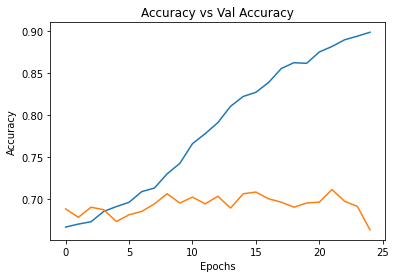

In [38]:
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.plot(val_acc)
plt.title("Accuracy vs Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

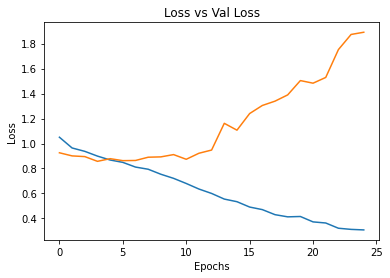

In [39]:
plt.plot(loss)
plt.plot(val_loss)
plt.title("Loss vs Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [6]:
from tensorflow.keras.models import load_model
 
# save model
# model.save('model_fp_89_66.h5')

In [4]:
model_fp = load_model('model_fp_89_66.h5')

In [5]:
model_fp.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 70, 70, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)       

In [7]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

data_labeled_dir = "./labeled_images/"
data_testing_path_image = data_labeled_dir+"AK/"+os.listdir(data_labeled_dir+"AK/")[0]
    
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(148, 148))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 148, 148, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img

image = load_image(data_testing_path_image)

In [9]:
model_fp.predict(image)

array([[0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [11]:
# Converting a tf.Keras model to a TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_keras_model(model_fp)

In [12]:
tflitemodel = converter.convert()
with open("model_fp_89_66.tflite","wb") as f:
    f.write(tflitemodel)

In [13]:
#SELESAI